<a href="https://colab.research.google.com/github/ismael-almazan/Programaci-n-para-anal-tica-descriptiva-y-predictiva/blob/main/Practica23_263177.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Regresión Lineal Simple con Scikit-Learn
---


## Datos del Estudiante

*   Apellidos y Nombre:  Almazan Luna Ismael
*   Matrícula: 263177

---

## Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar la regresión lineal simple utilizando Scikit-Learn para modelar la relación entre dos variables numéricas**, verificar los principales supuestos del modelo (linealidad, normalidad de residuos y homocedasticidad), **interpretar los coeficientes del modelo**, calcular e interpretar la **correlación entre variables** y evaluar el desempeño del modelo mediante métricas como el MSE, RMSE y R².


Trabajarás con el archivo restaurantes.csv, que contiene dos columnas:

- `poblation`: población de la ciudad (variable independiente). Tiene valores decimales mayores que cero. Estos valores representan la población de la ciudad multiplicada por 10,000. Por ejemplo, 6.1101 significa que la población de esa ciudad es 61,101.

- `profit`: ganancia del restaurante en esa ciudad (variable dependiente). Tiene valores decimales, algunos negativos y otros positivos. Estos representan las ganancias mensuales promedio de su restaurante en cada ciudad, en unidades de $10,000. Por ejemplo, 17.592 representa 175,920 en ganancias mensuales promedio para esa ciudad. -2.6807 representa -26,807 en pérdidas mensuales promedio para esa ciudad.





## 🔧 Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `restaurantes.csv`
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente el conjunto de datos.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

# CArgar el archivo
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/restaurantes.csv')
# Primeras filas
print("Primeras filas",df.head())
# Descripcion estadistica
print("\nDescripcion estadistica\n",df.describe())

Primeras filas    poblation   profit
0     6.1101  17.5920
1     5.5277   9.1302
2     8.5186  13.6620
3     7.0032  11.8540
4     5.8598   6.8233

Descripcion estadistica
        poblation     profit
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000


##  Parte 2: Análisis exploratorio y relación entre variables

### 2.1 Diagrama de Dispersión
1. Grafica un **diagrama de dispersión** entre `poblation` y `profit`
2. Responde:  
**¿La relación entre las variables parece lineal? ¿Por qué?**
*Si, a simple vista las dos variables parecen tener una relacion lineal positiva, la mayoria de las observaciones se encuentran en una banda creciente positiva en forma de linea, solo con algunas observaciones atipicas*

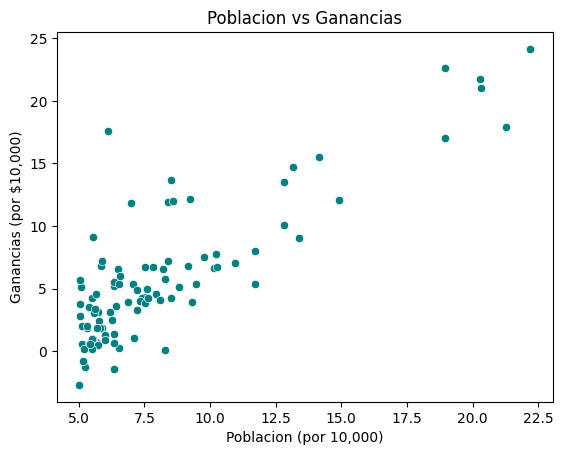

In [35]:
sns.scatterplot(x='poblation', y='profit', data=df, color='teal')
plt.title('Poblacion vs Ganancias')
plt.xlabel('Poblacion (por 10,000)')
plt.ylabel('Ganancias (por $10,000)')
plt.show()


### 2.2: Cálculo e interpretación de la correlación
1. Calcula e imprime el **coeficiente de correlación de Pearson** entre `poblation` y `profit`
2. Interpreta el resultado:
- ¿Qué tan fuerte es la relación? *La variables estan fuertemente correlacionadas*
- ¿Es positiva o negativa? *Positiva*
- ¿Es coherente con el gráfico anterior? *Si, el grafico muestra tambien una relacion positiva y fuerte entre las dos variables*

In [6]:
# Cálculo de correlación
corr = df['poblation'].corr(df['profit'])
print("Coeficiente de correlacion: ", corr)

Coeficiente de correlacion:  0.837873232526341


## Parte 3: Construcción del modelo, coeficientes y visualización

###3.1 Construcción del modelo - obtención de los parámetros y coeficientes
1. Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn
2. Imprime el intercepto y el coeficiente de la regresión (pendiente)
3. Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema?
4. Interpreta el coeficiente de la regresión (pendiente) ¿Qué significa en términos del contexto del problema?

* El intercepto es negativo, lo cual indica que asumiendo que la poblacion de una ciudad es de cero, el restaurante tendra ganancias negativas (Perdidas) de $38,957.80 en promedio. En el contexto del problema podria estar asociado a los costos fijos por ejemplo.

* El coeficiente o pendiente es positivo, lo cual indica una relacion positiva, en promedio un incremento de una unidad en la poblacion (por cada 10,000 personas), incrementara las ganancias en 1.193033 ($11,930.33 pesos) en promedio.

In [9]:
# Definir las variables
X = df[['poblation']]
y = df['profit']

#Modelo
modelo = LinearRegression()
modelo.fit(X, y)

#Intercepto  y Coeficiente
print("Intercepto (b0):", modelo.intercept_)
print("Pendiente (b1):", modelo.coef_[0])

Intercepto (b0): -3.8957808783118484
Pendiente (b1): 1.1930336441895932


### 3.2 Visualización del modelo
1. Grafica los puntos originales (poblation vs profit) y dibuja la línea de regresión ajustada.
2. Asegúrate de incluir leyenda y títulos.

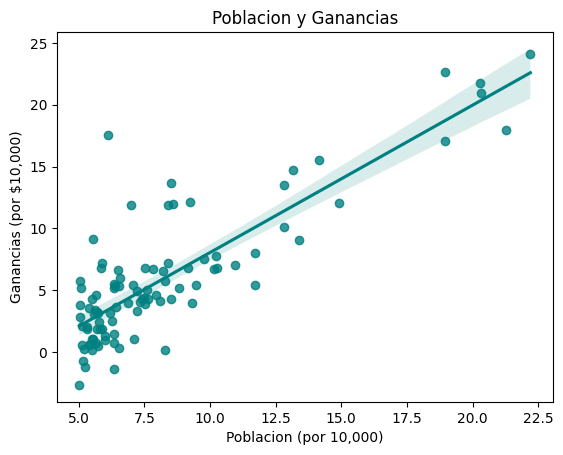

In [36]:
# Predicciones del modelo
y_pred = modelo.predict(X)


sns.regplot(x='poblation',  y='profit', data=df, color='teal')
plt.title('Poblacion y Ganancias')
plt.xlabel('Poblacion (por 10,000)')
plt.ylabel('Ganancias (por $10,000)')
plt.show()

## Parte 4: Supuestos del modelo de regresión lineal

### 4.1. Normalidad de los residuos
1. Calcula los residuos (reales - predichos).
2. Grafica un **histograma con KDE** de los residuos.
3. Responde: ¿Los residuos siguen una distribución normal?

* Aparentemente, los residuos siguen una distribucion proxima a la normalidad, con una media cercana a cero. Solo en el extremo superior (valores entre 12 y 15) se detectan observaciones atipicas

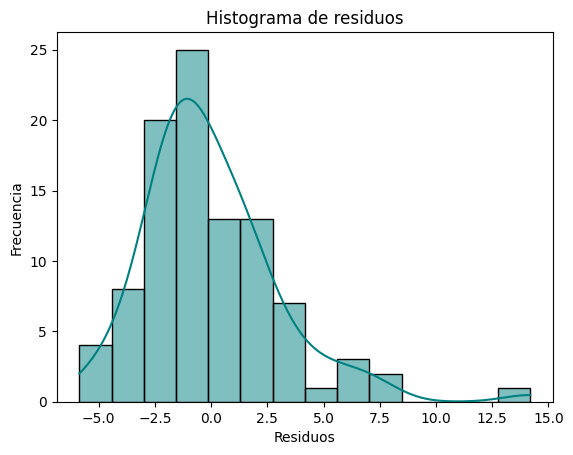

In [37]:
# Residuos
residuos = y - y_pred

# Histograma con KDE de los residuos.
sns.histplot(residuos, kde=True, color='teal')
plt.title('Histograma de residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()



### 4.2. Homocedasticidad
1. Grafica los residuos vs valores predichos.
2. ¿Los residuos están distribuidos aleatoriamente o muestran un patrón?

* Los residuos no muestran un patron visible que muestre indicios de heterocedasticidadn, en promedio se concentran cerca de cero y con varianza constante.

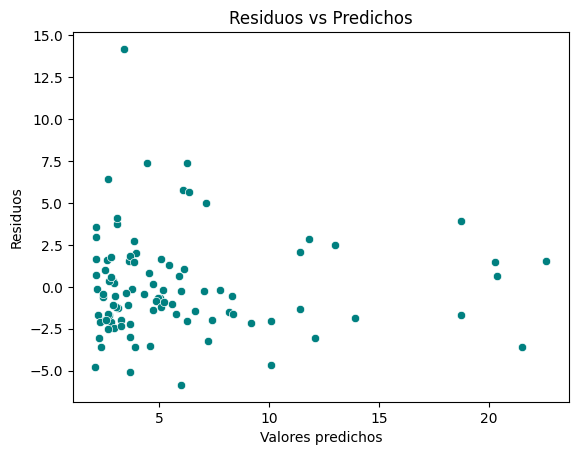

In [38]:
# Gráfico de residuos vs predichos
sns.scatterplot(x=y_pred, y=residuos, color='teal')
plt.title('Residuos vs Predichos')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.show()

### 4.3. Q-Q Plot para evaluar la normalidad
1. Grafica el Q-Q Plot:.
2. Interpreta el gráfico:

a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal y

b) Desviaciones sistemáticas indican asimetría o colas pesadas.


* El modelo tiene residuos que son aproximadamente normales en su centro, tiene solamente un valor atipico en la parte superior, el cual ya se habia evidenciado en el histograma

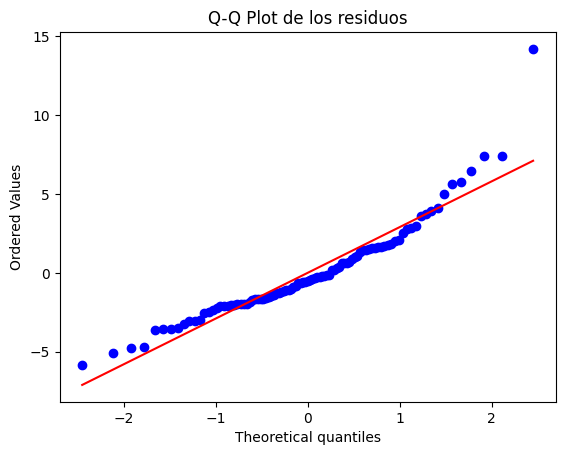

In [41]:
# Q-Q Plot c
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Q-Q Plot de los residuos')
plt.show()

## Parte 5: Evaluación del modelo
1. Calcula las métricas:
- MSE
- RMSE
- R²
2. Interpreta: ¿Qué nos dicen sobre el ajuste del modelo?

* Las metricas indican que el modelo se tiene un buen ajuste a los datos, el MSE y RMSE muetran que los errores promedio de prediccion son moderados, no se alejan demaciado de los datos reales (ganancias),
* y el r^2=0.70, indica que aproximadamente el 70% de la variabilidad de las ganancias puede explicarse por la variacion de la poblacion,mietras en 30% depende de otras variables no incluidas e el modelo.

In [30]:
# Evaluación del modelo
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MSE: 8.953942751950358
RMSE: 2.9923139460876023
R²: 0.7020315537841397


## Parte 6: Conclusiones
Responde con tus propias palabras:
- ¿Qué tan útil consideras el modelo?
- ¿Qué limitaciones encuentras?
- ¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el ajuste.
 ---------------------------------------------
* El  modelo es muy util, ya que con solo una variable (poblacion), se logra explicar aproximadamente el 70% de la variacion de las ganancias de los restaurantes.

* La principal limitacion creo que podria ser considerar solo una variable para explicar, ademas que los resultados solo muetran  correlacion no de causalidad.

* En este caso en particular creo que no es necesario estandarizar las variables ya que se estaria efectando la interpretabilidad.